In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

%matplotlib inline  
%config InlineBackend.figure_format = 'svg'

### Задание 1

Нарисуйте график функции:
y(x) = k∙cos(x – a) + b
для некоторых (2-3 различных) значений параметров k, a, b.

In [2]:
def fun_cos(x, k, a, b):
    return k * np.cos(x - a) + b

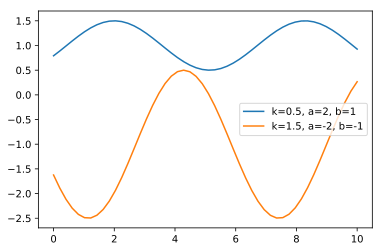

In [3]:
x = np.linspace(0, 10)
y = fun_cos(x=x, k=0.5, a=2, b=1)
plt.plot(x, y, label='k=0.5, a=2, b=1')
y = fun_cos(x=x, k=1.5, a=-2, b=-1)
plt.plot(x, y, label='k=1.5, a=-2, b=-1')
plt.legend()
plt.show()

### Задание 2

Докажите, что при ортогональном преобразовании сохраняется расстояние между точками.

Док-во: см. картинку.

### Задание 3

3.1 Напишите код, который будет переводить полярные координаты в декартовы.

In [4]:
def polar_to_cartesian(r, phi, x0=0.0, y0=0.0):
    return r * np.cos(phi) + x0, r * np.sin(phi) + y0

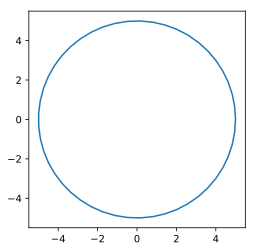

In [5]:
r = 5
phi = np.linspace(0, 2*np.pi)

x, y = polar_to_cartesian(r, phi)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_aspect(aspect='equal')
plt.show()

3.2 Напишите код, который будет рисовать график окружности в полярных координатах.

In [6]:
def cartesian_to_polar(x, y):
    return np.sqrt(x**2 + y**2), np.arctan2(y, x)

In [7]:
def polar_circle_plot(r, r0, phi0):
    t = np.linspace(0, 2*np.pi)
    x = r * np.cos(t) + (r0 * np.cos(phi0))
    y = r * np.sin(t) + (r0 * np.sin(phi0))
    r, phi = cartesian_to_polar(x, y)
    plt.polar(phi, r)    

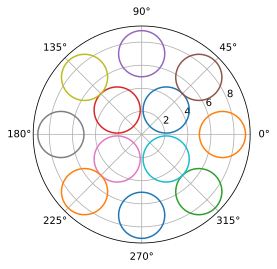

In [8]:
for i in range(0, 4):
    polar_circle_plot(2, 3, (2*i+1)*np.pi/4)
    polar_circle_plot(2, 7, 2*i*np.pi/4)
    polar_circle_plot(2, 7, (2*i-1)*np.pi/4)
plt.show()

### Задание 4

4.1 Решите систему уравнений: 1) y=x^2-1  2) exp(x)+x(1-y)=1

In [9]:
def equations(p):
    x, y = p
    return (x**2-y-1, np.exp(x) - x * y + x - 1)

In [10]:
a = -6.0
b = 6.0
x = np.linspace(a, b, num=int((b-a)/0.1))

In [11]:
roots = []
for _x in x:
    xr, yr = fsolve(equations, (_x, 0))
    xr = round(xr, 6)
    yr = round(yr, 6)
    if (xr, yr) not in roots:
        roots.append((xr, yr))

In [12]:
# корни
roots

[(-1.581835, 1.502203),
 (0.0, -1.0),
 (2.618146, 5.854686),
 (4.200106, 16.640889)]

In [13]:
# проверка
for r in roots:
    print(np.round(equations(r), 3))

[-0. -0.]
[0. 0.]
[0. 0.]
[0. 0.]


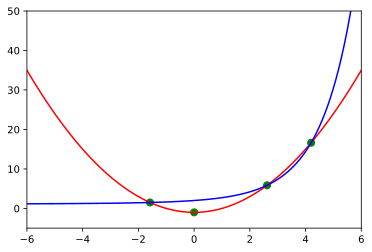

In [14]:
y = x**2 - 1
plt.plot(x, y, color='red')
y = (np.exp(x) + x - 1) / x # корень (0, -1) на графике не видно из-за деления на ноль в точке разрыва
plt.plot(x, y, color='blue')
plt.scatter(*zip(*roots), c='green', s=50)
plt.xlim(a, b)
plt.ylim(-5, 50)
plt.show()

4.2 Решите систему уравнений и неравенств: 1) y=x^2-1  2) exp(x)+x(1-y)>1

In [15]:
xdata = []
ydata = []
for _x in x:
    _y = _x**2 - 1
    if (np.exp(_x) - _x * _y + _x) > 1.0: # удаляем все точки, не удовлетворяющие неравенству
        xdata.append(_x)
        ydata.append(_y)

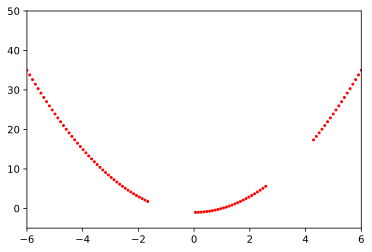

In [16]:
plt.scatter(xdata, ydata, color='red', s=4)
plt.xlim(a, b)
plt.ylim(-5, 50)
plt.show()